## Repressilator simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 5, 4

In [2]:
a0 = 0.03
a = 298.2
b = 0.2
n = 2
Dt = 0.01

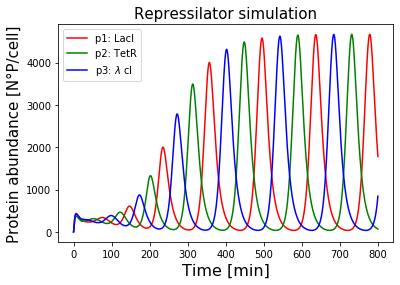

In [4]:
def initialize():
    global p1, p2, p3, m1, m2, m3, p1result, p2result, p3result, t, timesteps
    p1 = 0
    p2 = 0
    p3 = 0
    m1 = 5
    m2 = 0
    m3 = 0
    p1result = [p1]
    p2result = [p2]
    p3result = [p3]
    t = 0.
    timesteps = [t]

def observe():
    global p1, p2, p3, m1, m2, m3, p1result, p2result, p3result, t, timesteps
    p1result.append(p1)
    p2result.append(p2)
    p3result.append(p3)
    timesteps.append(t)

def update():
    global p1, p2, p3, m1, m2, m3, p1result, p2result, p3result, t, timesteps
    nextm1 = m1 + (a0 + a/(1 + p3**n) - m1) * Dt
    nextm2 = m2 + (a0 + a/(1 + p1**n) - m2) * Dt
    nextm3 = m3 + (a0 + a/(1 + p2**n) - m3) * Dt
    nextp1 = p1 + (b*m1 - b*p1) * Dt
    nextp2 = p2 + (b*m2 - b*p2) * Dt
    nextp3 = p3 + (b*m3 - b*p3) * Dt
    p1, p2, p3, m1, m2, m3 = nextp1, nextp2, nextp3, nextm1, nextm2, nextm3
    t += Dt

initialize()
while t < 279.:
    update()
    observe()
    
plt.plot(np.array(timesteps)/0.3485, 40*np.array(p1result), 'r-')
plt.plot(np.array(timesteps)/0.3485, 40*np.array(p2result), 'g-')
plt.plot(np.array(timesteps)/0.3485, 40*np.array(p3result), 'b-')
#plt.plot(timesteps, p1result, 'r-')
#plt.plot(timesteps, p2result, 'g-')
#plt.plot(timesteps, p3result, 'b-')
plt.legend(['p1: LacI', 'p2: TetR', r'p3: $\lambda$ cl'])
plt.xlabel('Time [min]', fontsize = 16)
plt.ylabel('Protein abundance [N°P/cell]', fontsize = 15)
plt.title('Repressilator simulation', fontsize = 15)
plt.show()